# EDA para TITANIC
Parte 1: Análisis exploratorio de datos (EDA): 
            
       1) Análisis de las características.
       2) Encontrar cualquier relación o tendencia considerando múltiples características.

Parte 2: Ingeniería de características y limpieza de datos:  

       1) Agregar algunas características.
       2) Eliminación de funciones redundantes.
       3) Convertir características en forme adecuada para modelar.

In [ ]:
from google.colab import drive 

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/colab_projects/titanic/data/titanic_train.csv')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#variable objetivo: Survived
#revisar la cantidad de valores nulos dentro de mi DataFrame
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 1.0, 'Cantidad de Sobrevivientes')

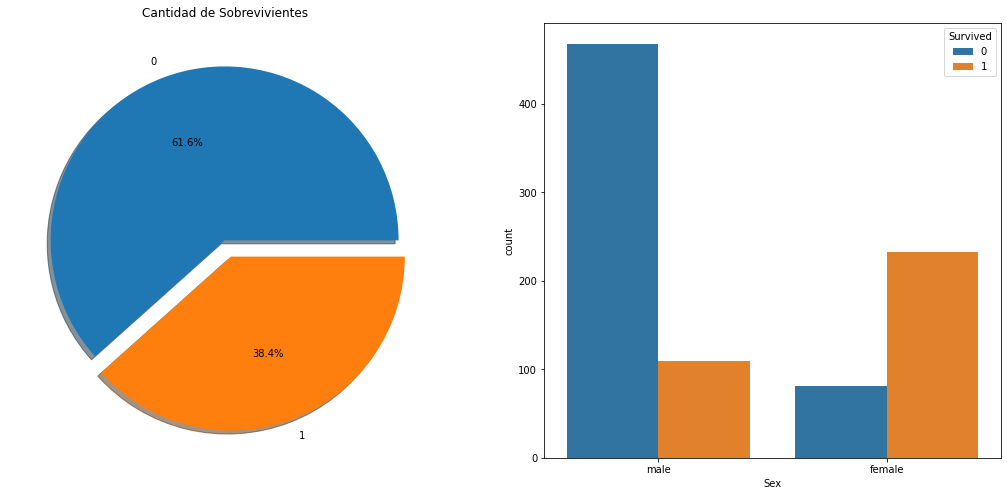

In [ ]:
f, ax = plt.subplots(1,2, figsize = (18,8))

data['Survived'].value_counts().plot.pie(autopct = '%1.1f%%' , ax = ax[0] , explode = [0, 0.1] , shadow = True)
ax[0].set_title('Sobrevivientes')
ax[0].set_ylabel('')


sns.countplot('Sex', hue = 'Survived', data = data, ax = ax[1])
ax[0].set_title('Cantidad de Sobrevivientes')

In [ ]:
# ANÁLISIS DE CARACTERÍSTICAS
#analizando variable sexo categórica


In [ ]:
data['PassengerId'].count()

891

In [ ]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

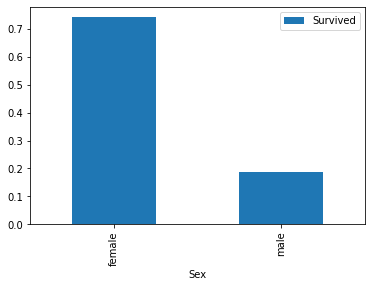

In [ ]:
#gráfico con el promedio de hombres y mujeres que sobreviven
data[ ['Sex','Survived'] ].groupby(['Sex']).mean().plot.bar()
plt.show()

In [ ]:
#Analizando variable ordinal Pclass

In [ ]:
pd.crosstab( data['Pclass'] , data['Survived'] , margins=True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Text(0.5, 0, 'Clase')

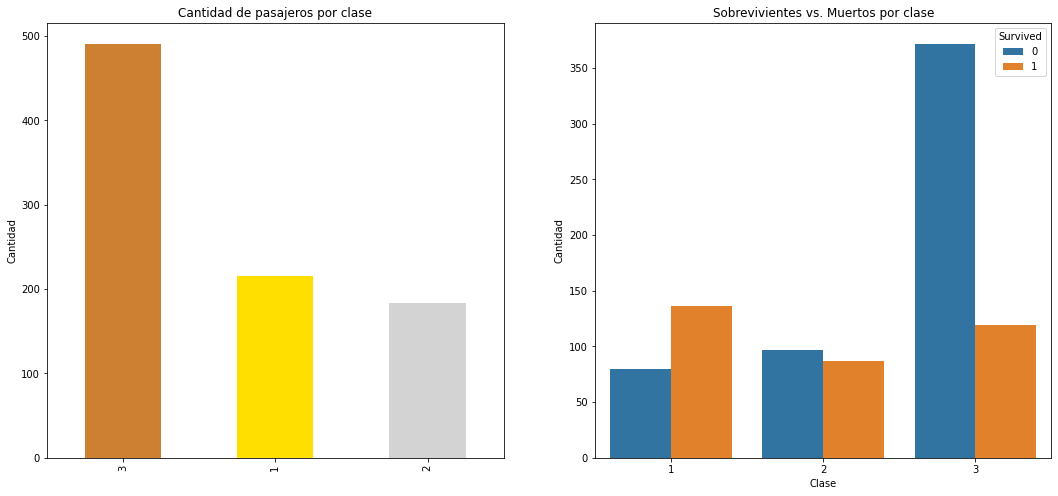

In [ ]:
f, ax = plt.subplots(1,2 , figsize = (18,8))

data['Pclass'].value_counts().plot.bar( ax = ax[0], color = [ '#CD7F32', '#FFDF00', '#D3D3D3' ])
ax[0].set_title('Cantidad de pasajeros por clase')
ax[0].set_ylabel('Cantidad')

sns.countplot('Pclass', hue ='Survived' , data= data, ax = ax[1])
ax[1].set_title('Sobrevivientes vs. Muertos por clase')
ax[1].set_ylabel('Cantidad')
ax[1].set_xlabel('Clase')

In [ ]:
#Analizar la tasa de supervivencia según Sexo y Clase

In [ ]:
pd.crosstab( [data['Sex'], data['Survived']], data['Pclass'], margins=True).style.background_gradient(cmap ='summer_r')

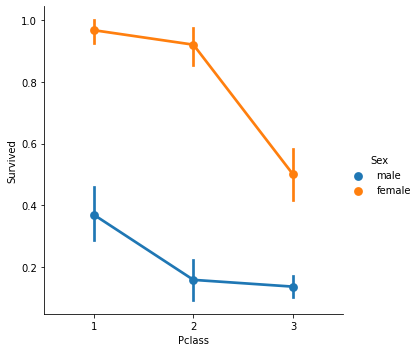

In [ ]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data = data)
plt.show()

In [ ]:
#Analizando el pasaje (Característica continua)

In [ ]:
print("El pasaje más caro: ", data['Fare'].max())
print("El pasaje más barato: ", data['Fare'].min())

El pasaje más caro:  512.3292
El pasaje más barato:  0.0


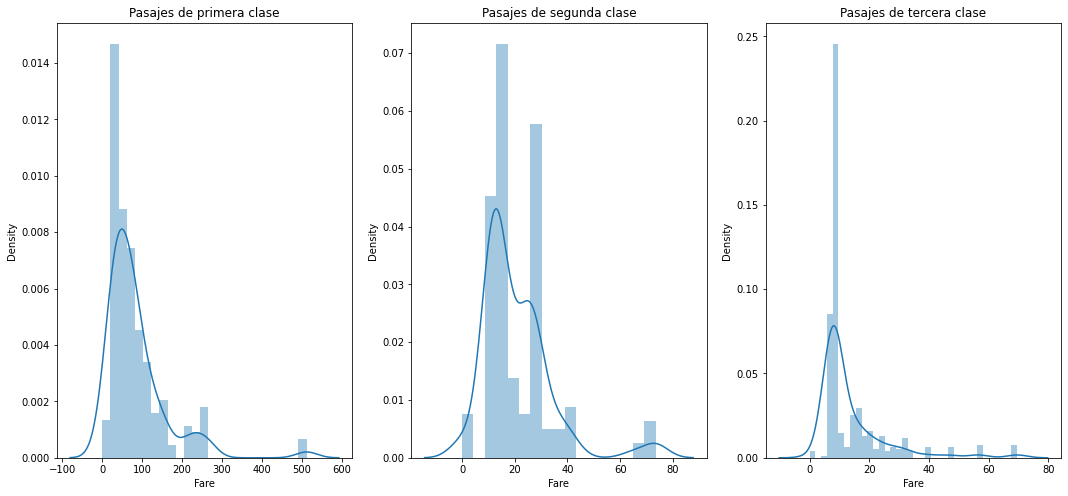

In [ ]:
f, ax = plt.subplots(1, 3, figsize = (18,8))
sns.distplot(  data[ data['Pclass'] == 1  ]['Fare'], ax = ax[0])
ax[0].set_title('Pasajes de primera clase')

sns.distplot(  data[ data['Pclass'] == 2  ]['Fare'], ax = ax[1])
ax[1].set_title('Pasajes de segunda clase')

sns.distplot(  data[ data['Pclass'] == 3  ]['Fare'], ax = ax[2])
ax[2].set_title('Pasajes de tercera clase')

plt.show()

In [ ]:
# LIMPIEZA DE DATOS

#1) Convertir algunas variables continuas en rangos.
#2) Convertir valores String en valores numéricos.
#3) Eliminar características innecesarias.
#4) Corregir valores nulos.


In [ ]:
# Problema con la característica de edad:

In [ ]:
#Binning o Normalization
data['rango_de_edad'] = 0
data.loc[data['Age'] <= 16, 'rango_de_edad'] = 0
data.loc[ (data['Age'] >16) & (data['Age'] <=32) , 'rango_de_edad'] = 1
data.loc[ (data['Age']>32) & (data['Age']<=48) , 'rango_de_edad'] = 2
data.loc[ (data['Age']>48) & (data['Age']<=64) , 'rango_de_edad'] = 3
data.loc[ data['Age']>64, 'rango_de_edad'] = 4

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,rango_de_edad
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


In [ ]:
#Comprobar el número de pasajeros en cada banda
data['rango_de_edad'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,rango_de_edad
1,346
0,277
2,188
3,69
4,11


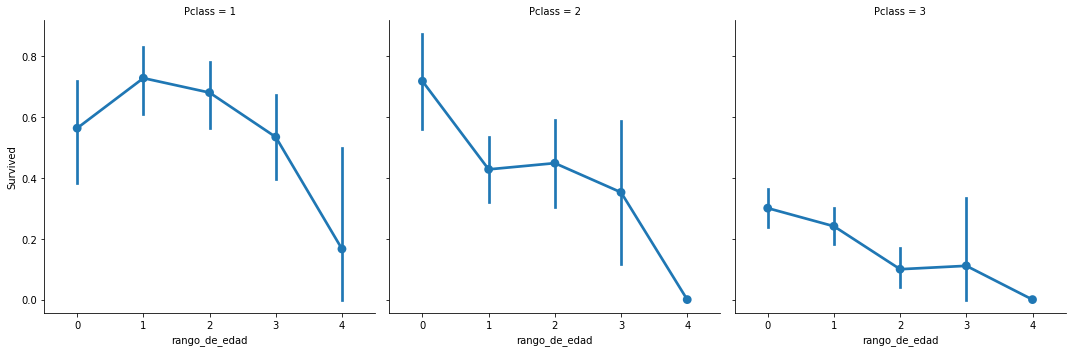

In [ ]:
sns.factorplot('rango_de_edad', 'Survived', data= data, col = 'Pclass')

plt.show()